# Check Environment

In [1]:
# Install library
! pip install git+https://github.com/serafi1204/Photographic_mosaic.git
#! pip install lpips

# Download Dataset file
! gdown --id 1lHwI78f2DrjB_1uRZyoA7HAnS1_UYeY2 --output dataset.npz
! gdown --id 1Nf3IRIm3pFIsFG0eO_Ay6ipg384iUNQn --output source.npz

  Cloning https://github.com/serafi1204/Photographic_mosaic.git to c:\users\serafi\appdata\local\temp\pip-req-build-lrl054mq
  Resolved https://github.com/serafi1204/Photographic_mosaic.git to commit da5189a5db3308b6bf05f82dcdf3cee22bf81fc0
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'


  Running command git clone --filter=blob:none --quiet https://github.com/serafi1204/Photographic_mosaic.git 'C:\Users\SERAFI\AppData\Local\Temp\pip-req-build-lrl054mq'
'gdown' is not recognized as an internal or external command,
operable program or batch file.
'gdown' is not recognized as an internal or external command,
operable program or batch file.


In [2]:
# import library
import photographic_mosaic as pm

import os
import cv2
import numpy as np
import torch

import matplotlib.pyplot as plt

# Define upload, download function
plot = lambda img : plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

try: 
    device = 'colab'
    
    from google.colab import files
    
    upload = lambda : list(files.upload().keys())[0]
    download = files.download

except:
    device = 'others'

    upload = lambda : 'target.png'#input("Type file path: ")
    download = lambda filename : print(f"Check '{os.getcwd()}/{filename}'")

# plot
print(device)

others


# Main

## STEP 0: Hyperparameter

In [3]:
# You can modify this parameters
USE_PRECALCULATED_MAP = False
DATASET_FILENAME  = 'dataset.npz'
SOURCE_FILENAME = 'source.npz'

MOSAIC_MAP_FILENAME = 'mosaic_map.npz'
MOSAIC_RESOLUTION = (2, 2)

OUTPUT_FILENAME = 'mosaic_output.png'
OUTPUT_ORIGIN = False

In [4]:
MOSAIC_SIZE = pm.MOSAIC_SIZE
SOURCE_SIZE = pm.SOURCE_SIZE

OUTPUT_SOURCE = SOURCE_FILENAME if OUTPUT_ORIGIN else DATASET_FILENAME

LABEL_COLOR = (
    [255, 0, 0],    # hane 
    [0, 255, 255],  # kimate
    [0, 0, 255],    # onharu
    [0, 255, 0]     # otonosori
)

## STEP 1: Upload Target Image

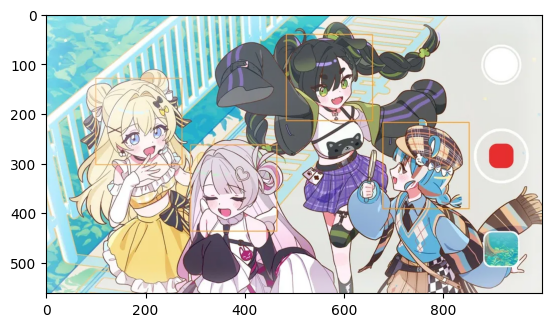

In [5]:
target = np.asarray(cv2.imread(upload()))

# plot
plot(target)

## STEP 2: Generate Mosaic map


Setting up [LPIPS] perceptual loss: trunk [vgg], v[0.1], spatial [off]


c:\Users\SERAFI\miniconda3\lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\Users\SERAFI\miniconda3\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG16_Weights.IMAGENET1K_V1`. You can also use `weights=VGG16_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Loading model from: c:\Users\SERAFI\miniconda3\lib\site-packages\lpips\weights\v0.1\vgg.pth


c:\Users\SERAFI\miniconda3\lib\site-packages\lpips\lpips.py:107: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  self.load_state_dict(torch.load(model_path, map_location='cpu'

25.0% (1/4)
50.0% (2/4)
75.0% (3/4)
100.0% (4/4)
[[1. 0.]
 [1. 1.]]


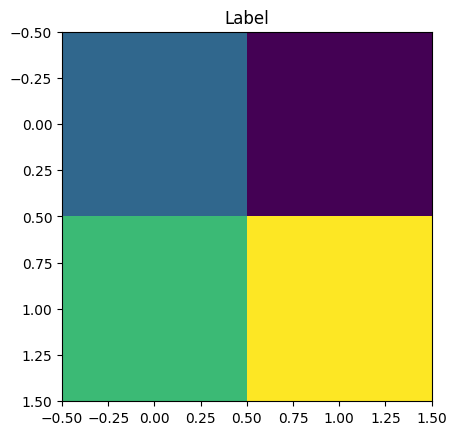

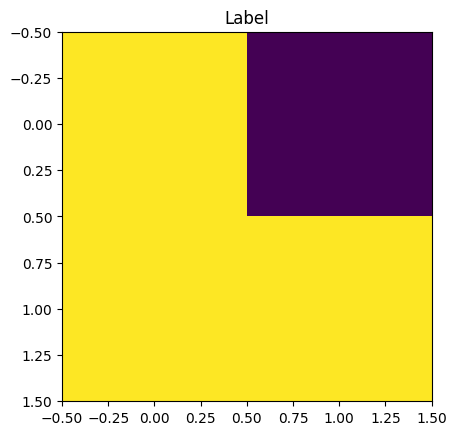

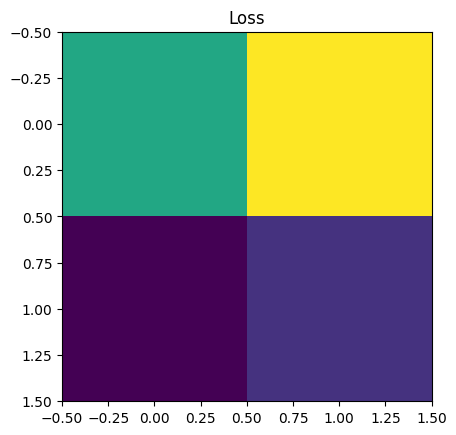

In [6]:
if (USE_PRECALCULATED_MAP):
    precalculated = np.load(MOSAIC_MAP_FILENAME)
    mosaic_map = precalculated['mosaic_map']
    label_map = precalculated['label_map']
    loss_map = precalculated['loss_map']

else:
    mosaic_map, label_map, loss_map = pm.makeMosaicMap(
        target = target, 
        source = DATASET_FILENAME,
        resolution = MOSAIC_RESOLUTION,
        label_color = LABEL_COLOR
    )

# save
np.savez_compressed(MOSAIC_MAP_FILENAME, mosaic_map=mosaic_map, label_map=label_map, loss_map=loss_map)

print(label_map)
# plot
plt.imshow(mosaic_map); plt.title('Label'); plt.show()
plt.imshow(label_map); plt.title('Label'); plt.show()

loss_norm = loss_map*255
plt.imshow(loss_norm); plt.title('Loss'); plt.show()

## STEP 3: Assamble Photographic Mosaic

KeysView(NpzFile 'dataset.npz' with keys: label, data)
Check 'c:\Users\SERAFI\Desktop\PROJECT\Hane\Photographic_mosaic/mosaic_output.png'
(48, 96, 3)


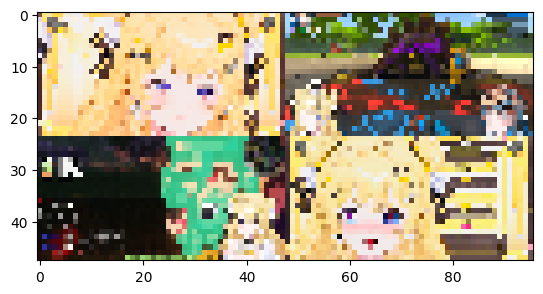

In [7]:
mosaic_output = pm.assamble(
    mosaic_map = mosaic_map,
    source = OUTPUT_SOURCE
)

# Save
cv2.imwrite(OUTPUT_FILENAME, mosaic_output)
download(OUTPUT_FILENAME)

# plot
print(mosaic_output.shape)
plot(mosaic_output)